In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [15]:
# Load CSV file
from scipy import stats

df = pd.read_csv('gait_speed_walk_test.csv')
df

from sklearn.ensemble import IsolationForest

# Initialize IsolationForest
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict outliers
outlier_pred = iso_forest.fit_predict(df)

# Outliers are marked as -1
outliers = df[outlier_pred == -1]
print(outliers)

   distance_walked  elapsed_time  average_speed  average_stride_length  \
2       400.440284      5.333333      75.082553              40.439154   

   NOSE_mean_magnitude  NOSE_std_dev  NOSE_circular_mean  NOSE_circular_std  \
2             9.360377     13.127939           -0.047488           0.406027   

   LEFT_SHOULDER_mean_magnitude  LEFT_SHOULDER_std_dev  ...  \
2                      9.804216               8.755356  ...   

   RIGHT_ANKLE_circular_std  LEFT_TOE_mean_magnitude  LEFT_TOE_std_dev  \
2                  0.936317                 8.947449         12.950895   

   LEFT_TOE_circular_mean  LEFT_TOE_circular_std  RIGHT_TOE_mean_magnitude  \
2                0.351872               1.708437                  9.548857   

   RIGHT_TOE_std_dev  RIGHT_TOE_circular_mean  RIGHT_TOE_circular_std  \
2          14.764177                 0.521908                1.669703   

   frailty_score  
2             10  

[1 rows x 49 columns]


In [16]:
# drop all columns with headers that contain 'circular_mean' or 'circular_std' or 'mean_magnitude'
df = df[df.columns.drop(list(df.filter(regex='circular_mean')))]
df = df[df.columns.drop(list(df.filter(regex='circular_std')))]
df = df[df.columns.drop(list(df.filter(regex='mean_magnitude')))]
relevant_keypoints = ["RIGHT_ANKLE", "RIGHT_KNEE", "RIGHT_HIP", "RIGHT_SHOULDER"]
# drop all non relevant keypoints
df = df[df.columns.drop(list(df.filter(regex='LEFT')))]
df = df[df.columns.drop(list(df.filter(regex='NOSE')))]
df = df[df.columns.drop(list(df.filter(regex='TOE')))]


# drop distance_walked
df = df.drop(columns=['distance_walked'])
df = df.drop(columns=['elapsed_time'])

df.sort_values(by=['frailty_score'], inplace=True)
df

testing_input = df.iloc[2]
testing_input = testing_input.drop(labels=['frailty_score'])
testing_input['speed_to_stride_ratio'] = testing_input['average_speed'] / testing_input['average_stride_length']
# Knee to hip ratio
testing_input['knee_to_hip_ratio'] = testing_input['RIGHT_KNEE_std_dev'] / testing_input['RIGHT_HIP_std_dev']
print(testing_input)

average_speed             75.082553
average_stride_length     40.439154
RIGHT_SHOULDER_std_dev     3.932832
RIGHT_HIP_std_dev         26.025438
RIGHT_KNEE_std_dev        12.876511
RIGHT_ANKLE_std_dev       11.263035
speed_to_stride_ratio      1.856680
knee_to_hip_ratio          0.494766
Name: 2, dtype: float64


In [17]:
# # Frailty scoring of 1-10
# # Create synthetic data for my dataframe till 100 rows
# # Define ranges for data generation based on the provided benchmark


# benchmark = df.iloc[0]
# n_samples = 100
# frailty_scores = np.round(np.linspace(1, 10, n_samples), 1)  # 100 frailty scores up to 1 decimal

# # Generate synthetic data
# synthetic_data = []
# for score in frailty_scores:
#     if score > 5:
#         avg_speed = np.random.uniform(50, 100)  # Average speed < 100 for scores > 5
#     else:
#         avg_speed = np.random.uniform(100, benchmark['average_speed'])  # Average speed >= 100 for scores <= 5

#     # Smaller stride lengths for higher frailty scores
#     stride_length = np.random.uniform(40, 80) if score <= 5 else np.random.uniform(30, 60)
    
#     # Standard deviations smaller for higher frailty scores
#     shoulder_std = np.random.uniform(20, 50) if score <= 5 else np.random.uniform(5, 20)
#     hip_std = np.random.uniform(15, 40) if score <= 5 else np.random.uniform(3, 15)
#     knee_std = np.random.uniform(25, 60) if score <= 5 else np.random.uniform(5, 20)
#     ankle_std = np.random.uniform(30, 80) if score <= 5 else np.random.uniform(10, 25)

#     # Append the generated data for this row
#     synthetic_data.append({
#         'average_speed': avg_speed,
#         'average_stride_length': stride_length,
#         'RIGHT_SHOULDER_std_dev': shoulder_std,
#         'RIGHT_HIP_std_dev': hip_std,
#         'RIGHT_KNEE_std_dev': knee_std,
#         'RIGHT_ANKLE_std_dev': ankle_std,
#         'frailty_score': score
#     })

# # Convert to DataFrame
# df_synthetic = pd.DataFrame(synthetic_data)
# df_synthetic

# # plot the synthetic data
# plt.scatter(df_synthetic['frailty_score'], df_synthetic['average_speed'])
# plt.xlabel('Frailty Score')
# plt.ylabel('Average Speed')
# plt.title('Average Speed vs Frailty Score')
# plt.show()


77.99354282512445


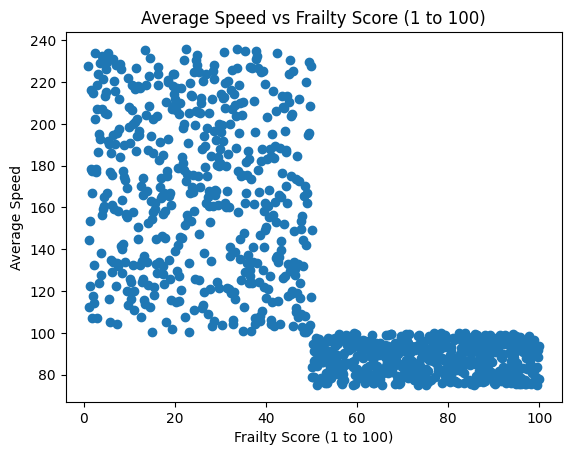

In [19]:
# Testing with score of 1-100
# Adjust the code to generate frailty scores from 1 to 100 instead of 1 to 10

# Create synthetic data for my dataframe till 100 rows
# Define ranges for data generation based on the provided benchmark

# update frailty_score column to be 10x original value
# df['frailty_score'] = df['frailty_score'] * 10
# print(df)
lowest_frailty_benchmark = df.iloc[0]
highest_frailty_benchmark = df.iloc[-1]
n_samples = 1000
frailty_scores = np.round(np.linspace(1, 100, n_samples), 1)  # 100 frailty scores from 1 to 100

# Generate synthetic data
synthetic_data = []
for score in frailty_scores:
    if score > 50:
        avg_speed = np.random.uniform(100, highest_frailty_benchmark['average_speed'])  # Average speed < 100 for scores > 50
    else:
        avg_speed = np.random.uniform(lowest_frailty_benchmark['average_speed'],100)  # Average speed >= 100 for scores <= 50

    # Smaller stride lengths for higher frailty scores
    stride_length = np.random.uniform(lowest_frailty_benchmark['average_stride_length'], highest_frailty_benchmark['average_stride_length'])
    
    # Standard deviations smaller for higher frailty scores
    shoulder_std = np.random.uniform(highest_frailty_benchmark['RIGHT_SHOULDER_std_dev'], lowest_frailty_benchmark['RIGHT_SHOULDER_std_dev'])
    hip_std = np.random.uniform(highest_frailty_benchmark['RIGHT_HIP_std_dev'], lowest_frailty_benchmark['RIGHT_HIP_std_dev'])
    knee_std = np.random.uniform(highest_frailty_benchmark['RIGHT_KNEE_std_dev'], lowest_frailty_benchmark['RIGHT_KNEE_std_dev'])
    ankle_std = np.random.uniform(highest_frailty_benchmark['RIGHT_ANKLE_std_dev'], lowest_frailty_benchmark['RIGHT_ANKLE_std_dev'])

    # Append the generated data for this row
    synthetic_data.append({
        'average_speed': avg_speed,
        'average_stride_length': stride_length,
        'RIGHT_SHOULDER_std_dev': shoulder_std,
        'RIGHT_HIP_std_dev': hip_std,
        'RIGHT_KNEE_std_dev': knee_std,
        'RIGHT_ANKLE_std_dev': ankle_std,
        'frailty_score': score
    })

# Convert to DataFrame
df_synthetic = pd.DataFrame(synthetic_data)
df.iloc[-1] = highest_frailty_benchmark
df_synthetic.to_csv('synthetic_data.csv')
print(df_synthetic['average_speed'].iloc[-1])

# Plot the synthetic data
plt.scatter(df_synthetic['frailty_score'], df_synthetic['average_speed'])
plt.xlabel('Frailty Score (1 to 100)')
plt.ylabel('Average Speed')
plt.title('Average Speed vs Frailty Score (1 to 100)')
plt.show()


In [14]:
import pandas as pd
imported_syntethic_df = pd.read_csv('synthetic_data.csv')
imported_syntethic_df.drop(columns=['Unnamed: 0'], inplace=True)

# average speed to average stride length ratio
imported_syntethic_df['speed_to_stride_ratio'] = imported_syntethic_df['average_speed'] / imported_syntethic_df['average_stride_length']
# Knee to hip ratio
imported_syntethic_df['knee_to_hip_ratio'] = imported_syntethic_df['RIGHT_KNEE_std_dev'] / imported_syntethic_df['RIGHT_HIP_std_dev']
# imported_syntethic_df.drop(columns=['RIGHT_KNEE_std_dev'], inplace=True)
# imported_syntethic_df.drop(columns=['RIGHT_HIP_std_dev'], inplace=True)
imported_syntethic_df

,average_speed,average_stride_length,RIGHT_SHOULDER_std_dev,RIGHT_HIP_std_dev,RIGHT_KNEE_std_dev,RIGHT_ANKLE_std_dev,frailty_score,speed_to_stride_ratio,knee_to_hip_ratio
0,227.717426,48.127749,29.288862,29.286739,29.514056,14.302614,1.0,4.731520,1.007762
1,144.306072,52.517144,16.450040,31.112879,45.385557,32.795891,1.1,2.747790,1.458739
2,112.297084,51.338588,19.971482,34.454342,46.302062,17.547182,1.2,2.187382,1.343867
3,153.405535,46.165850,16.931291,35.655221,43.460018,20.618306,1.3,3.322922,1.218896
4,122.356290,50.918912,39.177396,28.467094,29.924091,34.633413,1.4,2.402964,1.051182
...,...,...,...,...,...,...,...,...,...
995,75.116396,55.783068,38.728069,32.542014,28.215485,15.618800,99.6,1.346581,0.867048
996,88.661863,59.382393,38.949765,31.458183,15.818702,29.209644,99.7,1.493067,0.502849
997,91.814397,44.876028,23.803155,33.214381,28.252078,30.669265,99.8,2.045956,0.850598
998,93.770082,43.568581,36.197226,32.139249,36.157146,17.961242,99.9,2.152241,1.125015


In [15]:
X = imported_syntethic_df.drop(columns=['frailty_score'])
print(X.columns)

y = imported_syntethic_df['frailty_score']
# y

Index(['average_speed', 'average_stride_length', 'RIGHT_SHOULDER_std_dev',
       'RIGHT_HIP_std_dev', 'RIGHT_KNEE_std_dev', 'RIGHT_ANKLE_std_dev',
       'speed_to_stride_ratio', 'knee_to_hip_ratio'],
      dtype='object')


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features (X) and target (y)
X = imported_syntethic_df.drop(columns=['frailty_score'])  # All columns except frailty_score
y = imported_syntethic_df['frailty_score']  # Target variable

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_score = lr_model.score(X_test, y_test)


print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2_score:.2f}')

# print(lr_model.predict(testing_input.drop(columns=['frailty_score']).values.reshape(1, -1)))

Mean Absolute Error: 15.15
Mean Squared Error: 357.07
R^2 Score: 0.56


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define a weight map for the features
weight_map = {
    'average_speed': 5.0,            # Highest weight for average speed
    'RIGHT_HIP_std_dev': 3.0,        # Second highest for hip std deviation
    'average_stride_length': 2.0,    # Third for stride length
    'RIGHT_SHOULDER_std_dev': 1.5,   # Fourth for shoulder std deviation
    'RIGHT_KNEE_std_dev': 1.2,       # Fifth for knee std deviation
    'RIGHT_ANKLE_std_dev': 0.8,      # Lowest for ankle std deviation
    'speed_to_stride_ratio': 4.0,     # Feature engineering efforts
    'knee_to_hip_ratio': 3.0  
}
# weight map with all 1s
# weight_map = {
#     'average_speed': 1.0,            # Highest weight for average speed
#     'RIGHT_HIP_std_dev': 1.0,        # Second highest for hip std deviation
#     'average_stride_length': 1.0,    # Third for stride length
#     'RIGHT_SHOULDER_std_dev': 1.0,   # Fourth for shoulder std deviation
#     'RIGHT_KNEE_std_dev': 1.0,       # Fifth for knee std deviation
#     'RIGHT_ANKLE_std_dev': 1.0,      # Lowest for ankle std deviation
#     'speed_to_stride_ratio': 1.0,     # Feature engineering efforts
#     'knee_to_hip_ratio': 1.0
# }

    

# Apply the weight map to the training and testing data
X_train_weighted = X_train.copy()
X_test_weighted = X_test.copy()

for feature, weight in weight_map.items():
    X_train_weighted[feature] = X_train_weighted[feature] * weight
    X_test_weighted[feature] = X_test_weighted[feature] * weight

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model with weighted features
rf_model.fit(X_train_weighted, y_train)

# Make predictions on the weighted test set
y_pred_rf = rf_model.predict(X_test_weighted)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_score_rf = rf_model.score(X_test_weighted, y_test)

print(f'Random Forest Mean Absolute Error: {mae_rf:.2f}')
print(f'Random Forest Mean Squared Error: {mse_rf:.2f}')
print(f'Random Forest R^2 Score: {r2_score_rf:.2f}')

# Adjust the testing_input with the weight map and make predictions
# testing_input_weighted = testing_input.copy()
# for feature, weight in weight_map.items():
#     testing_input_weighted[feature] = testing_input_weighted[feature] * weight

# # Make prediction for the single testing input
# prediction = rf_model.predict(testing_input_weighted.values.reshape(1, -1))
# print(f"Predicted frailty score for the testing input: {prediction[0]:.2f}")


Random Forest Mean Absolute Error: 12.49
Random Forest Mean Squared Error: 219.15
Random Forest R^2 Score: 0.73


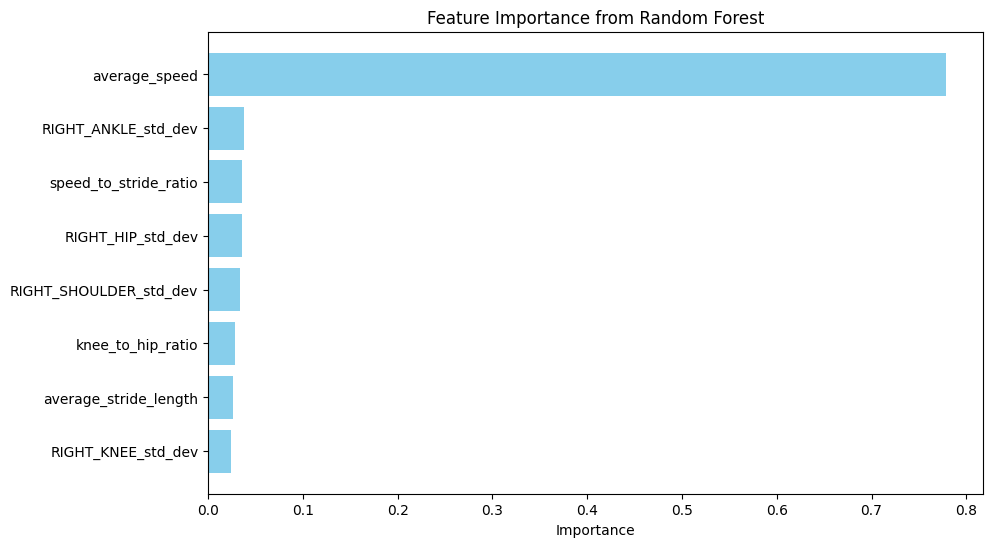

In [18]:
# Import the required library for plotting
import matplotlib.pyplot as plt

# Get the feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Get the feature names from the dataset
feature_names = X_train.columns

# Create a DataFrame for the feature importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the feature importances in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # To display the most important features on top
plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

# param_grid = {
#     'n_estimators': [100, 200, 300, 500],  # Add more estimators
#     'max_depth': [None, 10, 20, 30, 40],   # Expand depth range
#     'min_samples_split': [2, 5, 10, 15],   # Test larger splits
#     'min_samples_leaf': [1, 2, 4, 6],      # Include larger values for leaf nodes
#     'bootstrap': [True, False],
#     'max_features': ['auto', 'sqrt', 'log2'],  # Add feature sampling techniques
# }


# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Fit the grid search model to the training data
grid_search.fit(X_train_weighted, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

# Get the best estimator (model with the best parameters)
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best_rf = best_rf_model.predict(X_test_weighted)
print(f"y_pred_best_rf: {y_pred_best_rf}")
# Calculate performance metrics
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)

print(f"Best Random Forest Model MAE: {mae_best_rf:.2f}")
print(f"Best Random Forest Model MSE: {mse_best_rf:.2f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=

In [20]:
# XGBoost Model
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error



# Apply the weight map to the training and testing data
X_train_weighted = X_train.copy()
X_test_weighted = X_test.copy()

for feature, weight in weight_map.items():
    X_train_weighted[feature] = X_train_weighted[feature] * weight
    X_test_weighted[feature] = X_test_weighted[feature] * weight

# Initialize the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the XGBoost model with weighted features
xgb_model.fit(X_train_weighted, y_train)

# Make predictions on the weighted test set
y_pred_xgb = xgb_model.predict(X_test_weighted)

# Evaluate the XGBoost model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_score_xgb = xgb_model.score(X_test_weighted, y_test)

print(f'XGBoost Mean Absolute Error: {mae_xgb:.2f}')
print(f'XGBoost Mean Squared Error: {mse_xgb:.2f}')
print(f'XGBoost R^2 Score: {r2_score_xgb:.2f}')

# Adjust the testing_input with the weight map and make predictions
testing_input_weighted = testing_input.copy()
for feature, weight in weight_map.items():
    testing_input_weighted[feature] = testing_input_weighted[feature] * weight

# Make prediction for the single testing input using XGBoost
prediction_xgb = xgb_model.predict(testing_input_weighted.values.reshape(1, -1))
print(f"Predicted frailty score for the testing input (XGBoost): {prediction_xgb[0]:.2f}")


XGBoost Mean Absolute Error: 12.36
XGBoost Mean Squared Error: 222.71
XGBoost R^2 Score: 0.72


NameError: name 'testing_input' is not defined

In [13]:
# print all scores for different models
print(f"Linear Regression Model MAE: {mae:.2f}")
print(f"Random Forest Model MAE: {mae_rf:.2f}")
print(f"Best Random Forest Model MAE: {mae_best_rf:.2f}")
print(f"XGBoost Model MAE: {mae_xgb:.2f}")

# print all scores for different models
print(f"Linear Regression Model MSE: {mse:.2f}")
print(f"Random Forest Model MSE: {mse_rf:.2f}")
print(f"Best Random Forest Model MSE: {mse_best_rf:.2f}")
print(f"XGBoost Model MSE: {mse_xgb:.2f}")

# print all scores for different models
print(f"Linear Regression Model R^2 Score: {r2_score:.2f}")
print(f"Random Forest Model R^2 Score: {r2_score_rf:.2f}")
print(f"Best Random Forest Model R^2 Score: {best_rf_model.score(X_test_weighted, y_test):.2f}")
print(f"XGBoost Model R^2 Score: {r2_score_xgb:.2f}")

# present in a table format
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Best Random Forest', 'XGBoost'],
    'MAE': [mae, mae_rf, mae_best_rf, mae_xgb],
    'MSE': [mse, mse_rf, mse_best_rf, mse_xgb],
    'R^2 Score': [r2_score, r2_score_rf, best_rf_model.score(X_test_weighted, y_test), r2_score_xgb]
})
results


Linear Regression Model MAE: 15.09
Random Forest Model MAE: 12.54
Best Random Forest Model MAE: 12.26
XGBoost Model MAE: 12.27
Linear Regression Model MSE: 351.62
Random Forest Model MSE: 221.84
Best Random Forest Model MSE: 208.52
XGBoost Model MSE: 218.29
Linear Regression Model R^2 Score: 0.56
Random Forest Model R^2 Score: 0.72
Best Random Forest Model R^2 Score: 0.74
XGBoost Model R^2 Score: 0.73


,Model,MAE,MSE,R^2 Score
0,Linear Regression,15.089154,351.621070,0.561985
1,Random Forest,12.535915,221.844289,0.723648
2,Best Random Forest,12.258164,208.516178,0.740251
3,XGBoost,12.267010,218.288958,0.728077


In [30]:
import joblib
joblib.dump(best_rf_model, 'gswt_random_forest_model.pkl')


['gswt_random_forest_model.pkl']

In [31]:
# use my .pkl file to predict something
# Load the saved model
loaded_model = joblib.load('gswt_random_forest_model.pkl')

# Make prediction for the single testing input using the loaded model
prediction_loaded_model = loaded_model.predict(testing_input_weighted.values.reshape(1, -1))
prediction_loaded_model

/Users/brennanlee/Desktop/opencv-healthcare/myenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([73.80162924])